## Bank Telemarketing Campaign Case Study.

In this case study I'll be  Exploratory Data Analytics with the help of a case study on "Bank marketing campaign". 

#### Problem Statement:

 

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.


**What is the term Deposit?**

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

My target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate. 

#### Importing the libraries.

In [42]:
import warnings

In [43]:
import numpy as np
import pandas as pd

## Session- 2, Data Cleaning 

### Segment- 2, Data Types 

There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. You are required to get the idea about the data types after reading the data frame. 

Following are the some of the types of variables:
- **Numeric data type**: banking dataset: salary, balance, duration and age.
- **Categorical data type**: banking dataset: education, job, marital, poutcome and month etc.
- **Ordinal data type**: banking dataset: Age group.
- **Time and date type** 
- **Coordinates type of data**: latitude and longitude type.


#### Read in the Data set. 

In [44]:
data = pd.read_csv(r'/Users/aniketyadav/Documents/DS/Datasets/bnkdata.csv', skiprows=2)
dat2 = pd.read_csv(r'/Users/aniketyadav/Documents/DS/Datasets/bnkdata.csv', skiprows=2)

In [45]:
data.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"May, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"May, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"May, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"May, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"May, 2017",198 sec,1,-1,0,unknown,no


In [46]:
a = data['jobedu'].str.split(',')
a = list(a)
data['job'] = [a[i][0] for i in range(len(a))]
data['edu'] = [a[i][1] for i in range(len(a))]

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
 19  job         45211 non-nul

In [48]:
data.drop(columns=['customerid','jobedu'], inplace=True)

In [49]:
data['month'] = data['month'].fillna('').astype('str')

In [50]:
a = data['month'].str.split(',')
a=list(a)
print(a)
data['month'] = [a[i][0] for i in range(len(a))]



[['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', ' 2017'], ['May', '

In [51]:
(data[data['duration'].str.contains('sec', case=False)])['duration'].str.replace('sec','')


0        261 
1        151 
2         76 
3         92 
4        198 
         ... 
14110    173 
14111    261 
14112     87 
14113     42 
14114    131 
Name: duration, Length: 14115, dtype: object

In [52]:
data.loc[data['duration'].str.contains('sec', case=False), 'duration'] = (data['duration'].str.replace('sec','', case=False))


In [53]:
data.loc[data['duration'].str.contains('min', case=False), 'duration'] = (data['duration'].str.replace('min','', case=False))

In [54]:
data['duration'] = data.duration.astype('float64')

### Segment- 3, Fixing the Rows and Columns 

Checklist for fixing rows:
- **Delete summary rows**: Total and Subtotal rows
- **Delete incorrect rows**: Header row and footer row
- **Delete extra rows**: Column number, indicators, Blank rows, Page No.

Checklist for fixing columns:
- **Merge columns for creating unique identifiers**, if needed, for example, merge the columns State and City into the column Full address.
- **Split columns to get more data**: Split the Address column to get State and City columns to analyse each separately. 
- **Add column names**: Add column names if missing.
- **Rename columns consistently**: Abbreviations, encoded columns.
- **Delete columns**: Delete unnecessary columns.
- **Align misaligned columns**: The data set may have shifted columns, which you need to align correctly.


#### Read the file without unnecessary headers.

In [55]:
#read the file in inp0 without first two rows as it is of no use.
data

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,May,261.000000,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,May,151.000000,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,May,76.000000,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,May,92.000000,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,May,198.000000,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,Nov,16.283333,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,Nov,7.600000,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,Nov,18.783333,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,Nov,8.466667,4,-1,0,unknown,no,blue-collar,secondary


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       45191 non-null  float64
 1   salary    45211 non-null  int64  
 2   balance   45211 non-null  int64  
 3   marital   45211 non-null  object 
 4   targeted  45211 non-null  object 
 5   default   45211 non-null  object 
 6   housing   45211 non-null  object 
 7   loan      45211 non-null  object 
 8   contact   45211 non-null  object 
 9   day       45211 non-null  int64  
 10  month     45211 non-null  object 
 11  duration  45211 non-null  float64
 12  campaign  45211 non-null  int64  
 13  pdays     45211 non-null  int64  
 14  previous  45211 non-null  int64  
 15  poutcome  45211 non-null  object 
 16  response  45181 non-null  object 
 17  job       45211 non-null  object 
 18  edu       45211 non-null  object 
dtypes: float64(2), int64(6), object(11)
memory usage: 6.6+ MB


In [57]:
data = data.dropna(subset=['age'])

#### Dropping customer id column. 

#### Dividing "jobedu" column into job and education categories. 

### Segment- 4, Impute/Remove missing values 

Take aways from the lecture on missing values:

- **Set values as missing values**: Identify values that indicate missing data, for example, treat blank strings, "NA", "XX", "999", etc., as missing.
- **Adding is good, exaggerating is bad**: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to retain missing values rather than exaggerating the existing rows/columns.
- **Delete rows and columns**: Rows can be deleted if the number of missing values is insignificant, as this would not impact the overall analysis results. Columns can be removed if the missing values are quite significant in number.
- **Fill partial missing values using business judgement**: Such values include missing time zone, century, etc. These values can be identified easily.

Types of missing values:
- **MCAR**: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).
- **MAR**: It stands for Missing at random (the reason behind the missing value may be associated with some other features).
- **MNAR**: It stands for Missing not at random (there is a specific reason behind the missing value).


#### handling missing values in age column.

In [58]:
a=data[data['month']=='']['month'].reset_index()

In [59]:
cv=[]
for i , r in a.iterrows():
    cv.append(r['index'])
for i in cv:
    data.loc[i,'month'] = 'May'
data.loc[189,'month']
    


'May'

In [60]:
data.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response    30
job          0
edu          0
dtype: int64

Drop the records with age missing. 

#### handling missing values in month column

#### handling missing values in response column 

Target variable is better of not imputed.
- Drop the records with missing values.

In [61]:
data = data.dropna(subset=['response'])

In [62]:
data.sample(10)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
4889,36.0,20000,3202,divorced,yes,no,yes,no,unknown,21,May,290.000000,2,-1,0,unknown,no,blue-collar,primary
16071,32.0,100000,423,married,yes,no,no,no,cellular,22,Jul,3.533333,17,-1,0,unknown,no,management,tertiary
1503,31.0,60000,948,single,no,no,yes,no,unknown,8,May,91.000000,2,-1,0,unknown,no,technician,tertiary
31685,43.0,20000,902,married,yes,no,yes,no,cellular,7,Apr,1.516667,1,328,1,failure,no,blue-collar,secondary
21940,51.0,50000,173,married,yes,no,no,no,cellular,20,Aug,1.083333,2,-1,0,unknown,no,admin.,primary
30931,48.0,60000,150,married,yes,no,yes,no,cellular,9,Feb,2.800000,2,203,7,failure,no,technician,tertiary
4811,35.0,50000,498,married,yes,no,yes,no,unknown,21,May,248.000000,1,-1,0,unknown,no,admin.,secondary
16675,50.0,50000,26,single,yes,no,no,yes,telephone,24,Jul,2.983333,4,-1,0,unknown,no,admin.,secondary
45098,44.0,60000,11115,single,no,no,no,no,cellular,25,Oct,3.150000,1,185,4,success,no,technician,unknown
26874,44.0,60000,0,married,yes,no,no,no,cellular,20,Nov,14.050000,3,-1,0,unknown,no,self-employed,primary


#### handling pdays column. 

In [63]:
data['pdays'].replace(-1,np.nan, inplace=True)


/var/folders/m5/386nxng97ggdb8s09bq2m9sr0000gn/T/ipykernel_72126/1534340108.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['pdays'].replace(-1,np.nan, inplace=True)


In [64]:
data['pdays'].describe()

count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

-1 indicates the missing values.
Missing value does not always be present as null.
How to handle it:

Objective is:
- you should ignore the missing values in the calculations
- simply make it missing - replace -1 with NaN.
- all summary statistics- mean, median etc. we will ignore the missing values of pdays.

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/m5/386nxng97ggdb8s09bq2m9sr0000gn/T/ipykernel_72126/3825743090.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data['age'], palette=['yellow'])


<Axes: ylabel='age'>

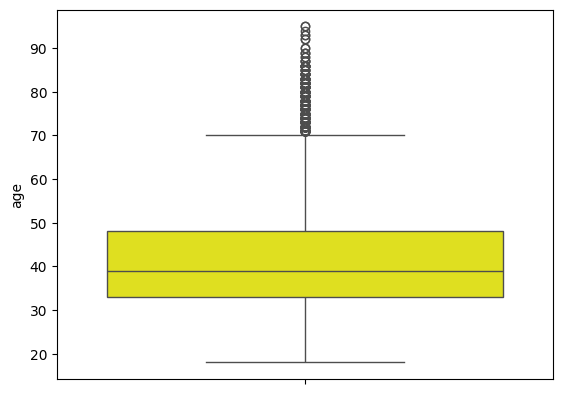

In [66]:
sns.boxplot(data['age'], palette=['yellow'])

### Segment- 5, Handling Outliers 

Major approaches to the treat outliers:
 		
- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


#### Age variable 

In [67]:
data['balance'].describe()

count     45161.000000
mean       1362.850690
std        3045.939589
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

/var/folders/m5/386nxng97ggdb8s09bq2m9sr0000gn/T/ipykernel_72126/3614275606.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data['balance'], palette=['red'])


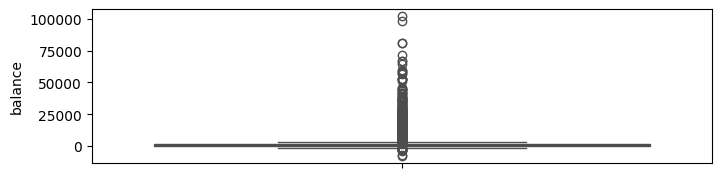

In [68]:
plt.figure(figsize=[8,2])
sns.boxplot(data['balance'], palette=['red'])
plt.show()


#### Salary variable 

In [69]:
data[data['salary']==0]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
4,33.0,0,1,single,no,no,no,no,unknown,5,May,198.000000,1,NaN,0,unknown,no,unknown,unknown
216,47.0,0,28,married,no,no,no,no,unknown,5,May,338.000000,2,NaN,0,unknown,no,unknown,unknown
354,59.0,0,27,divorced,no,no,no,no,unknown,5,May,347.000000,3,NaN,0,unknown,no,unknown,unknown
876,37.0,0,414,single,no,no,yes,no,unknown,7,May,131.000000,1,NaN,0,unknown,no,unknown,unknown
1072,29.0,0,50,single,yes,no,yes,no,unknown,7,May,50.000000,2,NaN,0,unknown,no,unknown,primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44714,45.0,0,406,married,yes,no,no,no,cellular,7,Sep,5.233333,1,NaN,0,unknown,yes,unknown,tertiary
44742,64.0,0,2799,married,no,no,no,no,telephone,9,Sep,6.300000,4,NaN,0,unknown,no,unknown,unknown
44970,28.0,0,326,single,no,no,no,no,cellular,11,Oct,7.500000,1,231.0,1,success,yes,unknown,unknown
45141,77.0,0,397,married,no,no,no,no,telephone,8,Nov,3.450000,1,185.0,3,success,no,unknown,unknown


In [70]:
data['salary'].describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

<Axes: ylabel='salary'>

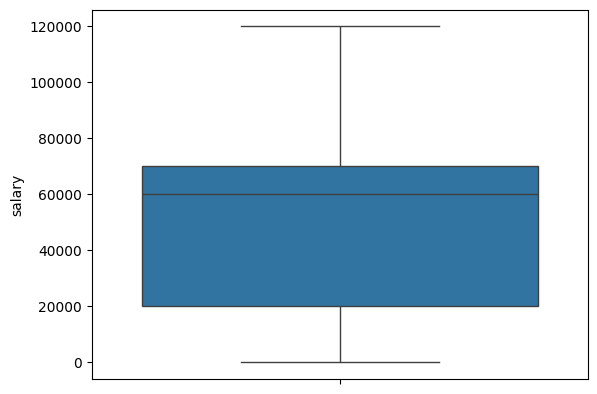

In [71]:
sns.boxplot(data['salary'])

In [72]:
data['duration'] = dat2['duration']

#### Balance variable 

In [73]:
data.loc[data['duration'].str.contains('min', case=False),'duration'] = (data.loc[data['duration'].str.contains('min', case=False), 'duration'].str.replace('min','').astype('float64'))*60.0

In [74]:
data.loc[data['duration'].str.contains('sec', case=False, na=False), 'duration'] = (
    data.loc[data['duration'].str.contains('sec', case=False, na=False), 'duration']
    .str.replace('sec', '', case=False)
    .astype(float)
)

In [75]:
data['duration'] = data['duration'].astype('float64')

In [76]:
data['duration_in_sec'] = data['duration']
data.drop(columns='duration', inplace=True)

### Segment- 6, Standardising values 

Checklist for data standardization exercises:
- **Standardise units**: Ensure all observations under one variable are expressed in a common and consistent unit, e.g., convert lbs to kg, miles/hr to km/hr, etc.
- **Scale values if required**: Make sure all the observations under one variable have a common scale.
- **Standardise precision** for better presentation of data, e.g., change 4.5312341 kg to 4.53 kg.
- **Remove extra characters** such as common prefixes/suffixes, leading/trailing/multiple spaces, etc. These are irrelevant to analysis.
- **Standardise case**: String variables may take various casing styles, e.g., UPPERCASE, lowercase, Title Case, Sentence case, etc.
- **Standardise format**: It is important to standardise the format of other elements such as date, name, etce.g., change 23/10/16 to 2016/10/23, “Modi, Narendra” to “Narendra Modi", etc.

#### Duration variable

## Session- 3, Univariate Analysis 

### Segment- 2, Categorical unordered univariate analysis 

Unordered data do not have the notion of high-low, more-less etc. Example:
- Type of loan taken by a person = home, personal, auto etc.
- Organisation of a person = Sales, marketing, HR etc.
- Job category of persone.
- Marital status of any one.


#### Marital status 

In [77]:
data.groupby('marital')['age'].count()
divorce_perc = (5198/45161) *100
married_perc = (27185/45161) * 100
single_perc = (12778/45161) *100
print(divorce_perc//1)
print(married_perc//1)
print(single_perc//1)

11.0
60.0
28.0


<Axes: >

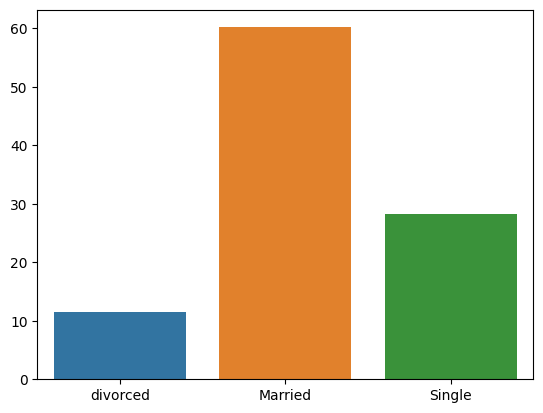

In [78]:
sns.barplot(x=['divorced','Married','Single'], y=[divorce_perc, married_perc, single_perc], hue=['divorced','Married','Single'])

#### Job  

<Axes: xlabel='job'>

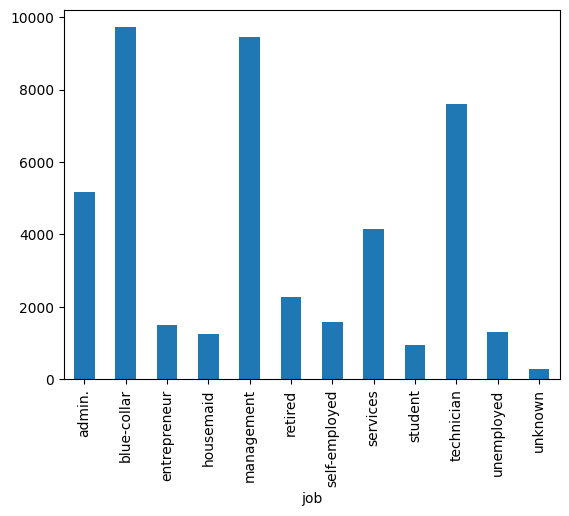

In [79]:
data.groupby('job')['age'].count().plot.bar()

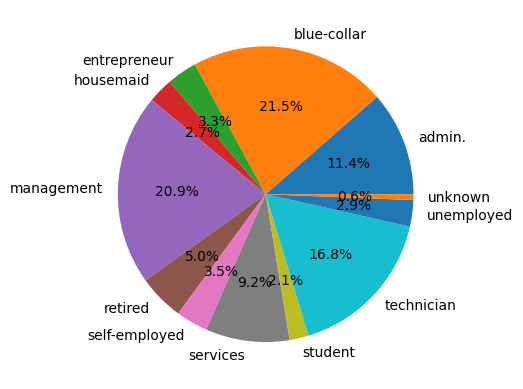

In [80]:
re2 = data.groupby('job')['age'].count().reset_index()
re2['perc'] = (re2['age']/45161)*100
plt.pie(re2['perc'], autopct='%.1f%%', labels=re2['job'])
plt.show()

### Segment- 3, Categorical ordered univariate analysis 

Ordered variables have some kind of ordering. Some examples of bank marketing dataset are:
- Age group= <30, 30-40, 40-50 and so on.
- Month = Jan-Feb-Mar etc.
- Education = primary, secondary and so on.

#### Education

<Axes: xlabel='edu'>

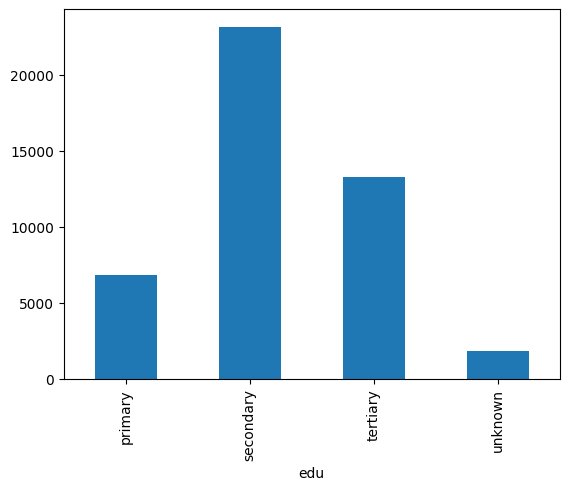

In [81]:
data.groupby('edu')['age'].count().plot.bar()


<Axes: xlabel='edu', ylabel='perc'>

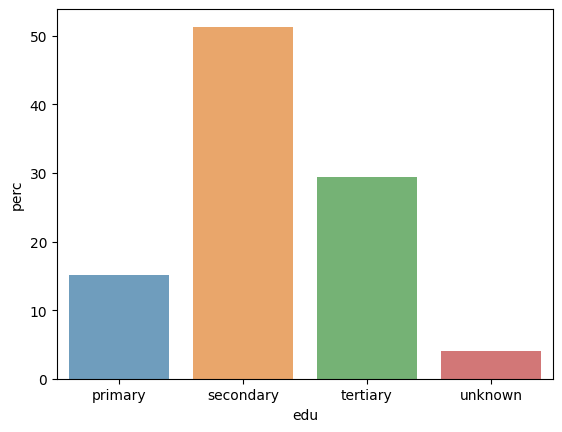

In [82]:
c = data.groupby('edu')['age'].count().reset_index()
c['perc'] = (c['age']/45161)*100
sns.barplot(x=c['edu'], y=c['perc'], hue=c['edu'], alpha=0.7)

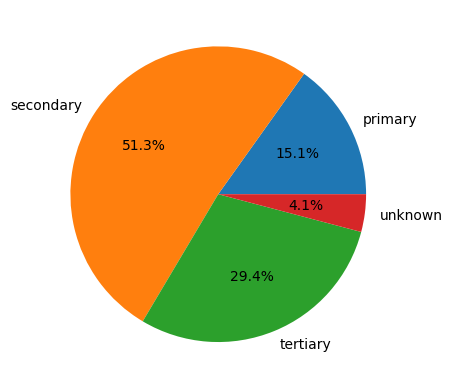

In [83]:
plt.pie(c['perc'], autopct='%.1f%%', labels=c['edu'])
plt.show()

#### poutcome 

<Axes: ylabel='age'>

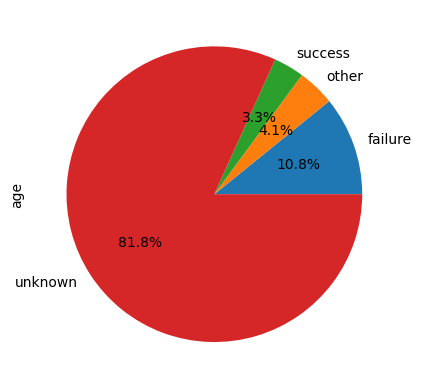

In [84]:
data.groupby('poutcome')['age'].count().plot.pie(autopct='%.1f%%')

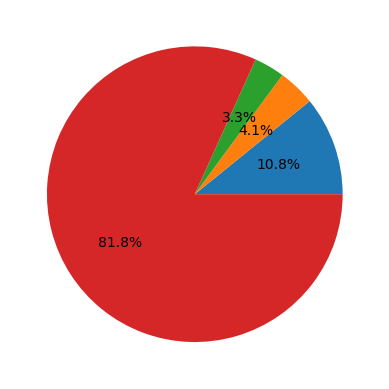

In [85]:
cf = data.groupby('poutcome')['age'].count().reset_index()
cf['perc'] = (cf['age']/45161)*100
plt.pie(cf['perc'], autopct='%.1f%%')
plt.show()

#### Response the target variable 

<Axes: ylabel='age'>

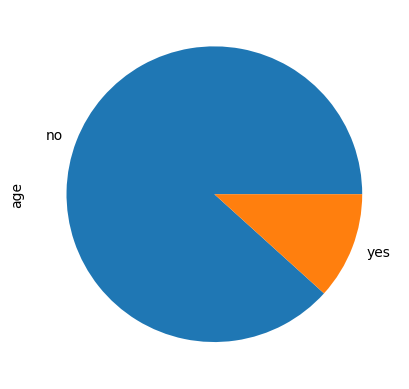

In [86]:
data.groupby('response')['age'].count().plot.pie()

In [87]:
d=data.groupby('response')['age'].count().reset_index()
d['count'] = d['age']
d.drop(columns='age', inplace=True)
d['perc']=(d['count']/45161)*100

([<matplotlib.patches.Wedge at 0x1484f14c0>,
 [Text(-1.0264931764128058, 0.3953628191648132, 'no'),
  Text(1.1198107756107476, -0.43130479573737224, 'yes')],
 [Text(-0.5599053689524395, 0.2156524468171708, '88.3%'),
  Text(0.6532229524396026, -0.25159446418013376, '11.7%')])

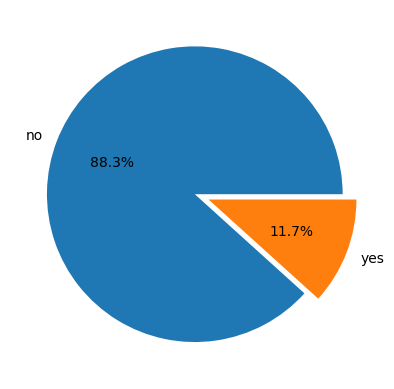

In [88]:
exp = [0,0.1]
plt.pie(d['perc'],explode=exp, autopct='%.1f%%', labels=d['response'])

## Session- 4, Bivariate and Multivariate Analysis

### Segment-2, Numeric- numeric analysis 

There are three ways to analyse the numeric- numeric data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

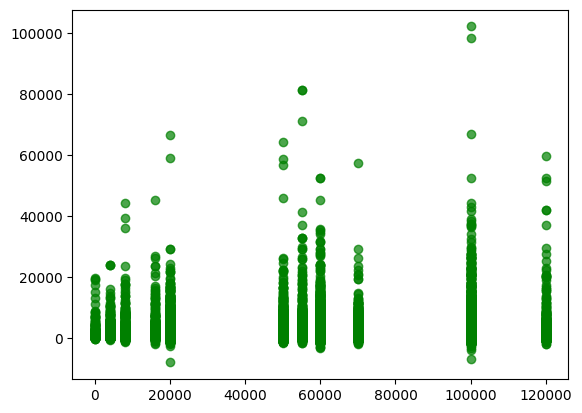

In [89]:
plt.scatter(x=data['salary'],
    y=data['balance'],
    marker='o',
    alpha=0.7,
    color='green')

/var/folders/m5/386nxng97ggdb8s09bq2m9sr0000gn/T/ipykernel_72126/1817026167.py:1: UserWarning: The sizes list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(


<Axes: xlabel='salary', ylabel='balance'>

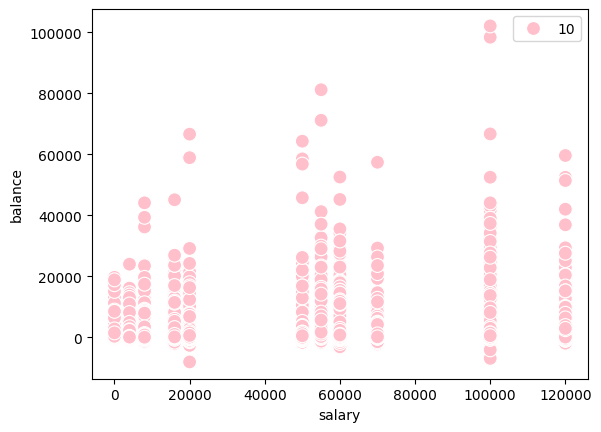

In [90]:
sns.scatterplot(
    x=data['salary'],
    y=data['balance'],
    size=10,
    color='pink',
    sizes=[100,1100]
)

<Axes: xlabel='age', ylabel='balance'>

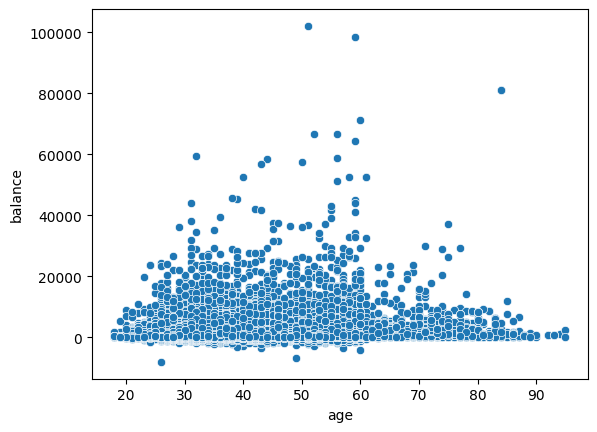

In [91]:
#plot the scatter plot of balance and age variable in inp1
sns.scatterplot(
    x=data['age'],
    y=data['balance']
)

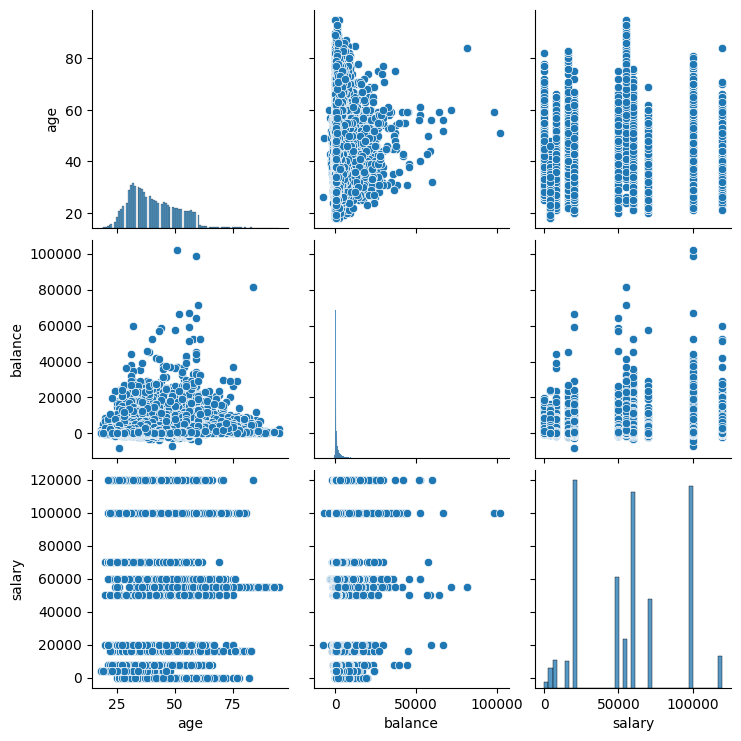

In [92]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(data[['age','balance', 'salary']])

#### Correlation heat map 

<Axes: >

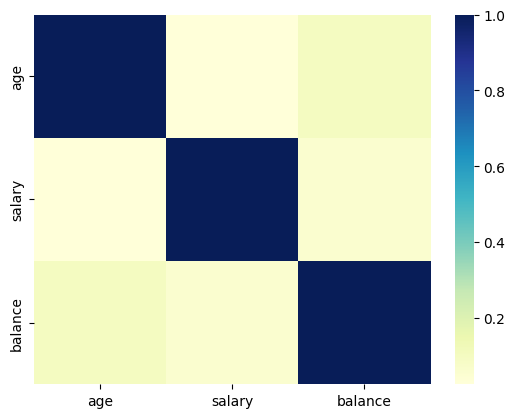

In [93]:
c= data[['age','salary','balance']].corr()
sns.heatmap(c,cmap="YlGnBu", cbar=True)

### Segment- 4, Numerical categorical variable

#### Salary vs response 

In [94]:
data.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [95]:
data[data['response']=='yes']['salary'].median()

np.float64(60000.0)

In [96]:
data.groupby('response')['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

/var/folders/m5/386nxng97ggdb8s09bq2m9sr0000gn/T/ipykernel_72126/2587726772.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(


<Axes: xlabel='response', ylabel='salary'>

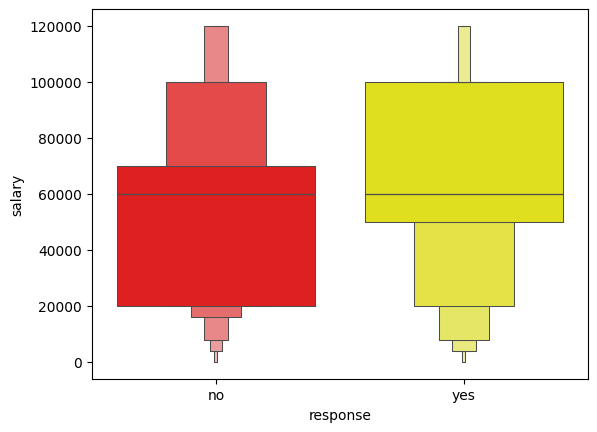

In [97]:
sns.boxenplot(
    x=data['response'],
    y=data['salary'],
    palette=['red','yellow']
)

#### Balance vs response 

/var/folders/m5/386nxng97ggdb8s09bq2m9sr0000gn/T/ipykernel_72126/3329217863.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(


<Axes: xlabel='response', ylabel='balance'>

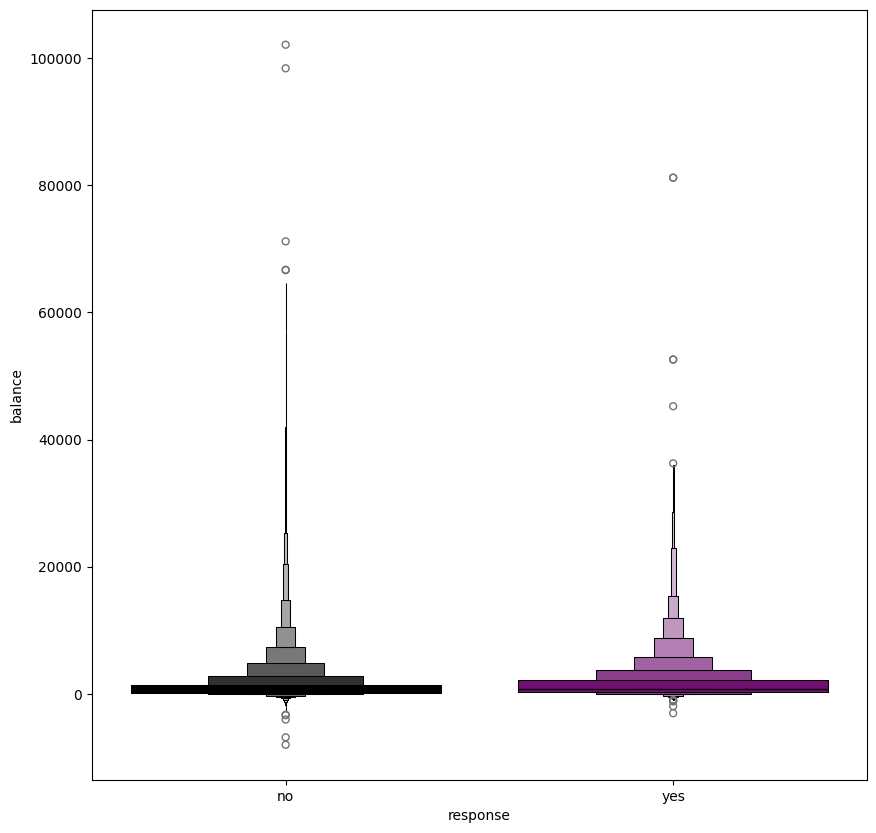

In [98]:
plt.figure(figsize=[10,10])
sns.boxenplot(
    x=data['response'],
    y=data['balance'],
    palette=['black','purple'],
)

In [99]:
data.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [100]:
q1 = data.groupby('response')['balance'].mean().reset_index()

##### 75th percentile 

In [101]:
def p75(x):
    return np.quantile(x, 0.75)

In [102]:
result = data.groupby('response')['balance'].agg(
    mean_balance='mean',
    median_balance='median',
    percentile_75=lambda x: x.quantile(0.75)
)
result=result.reset_index()

response
no     Axes(0.125,0.11;0.775x0.77)
yes    Axes(0.125,0.11;0.775x0.77)
dtype: object

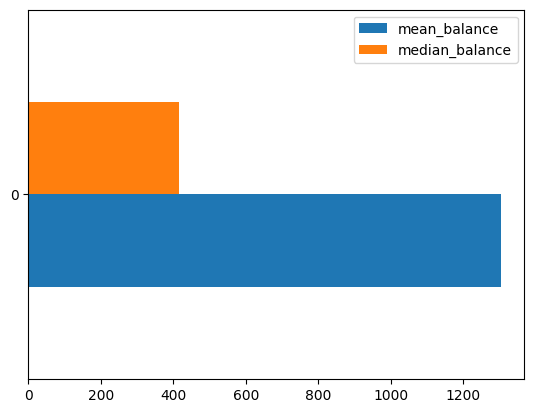

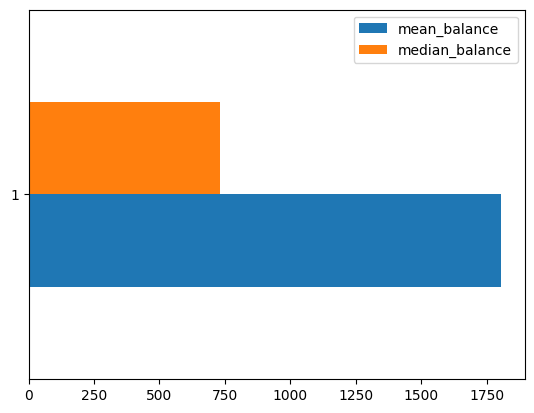

In [103]:
result.groupby('response')[['mean_balance','median_balance']].plot.barh()

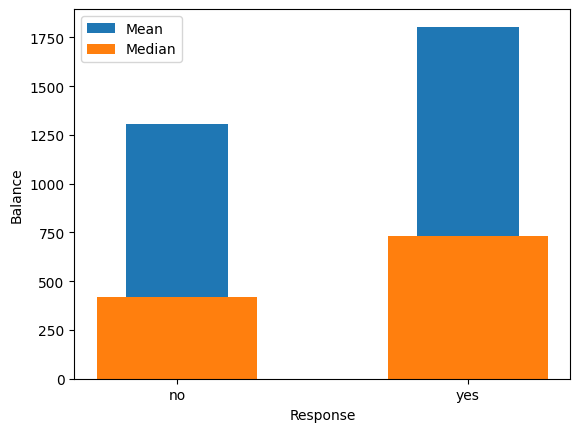

In [104]:
fig, ax = plt.subplots()
bar_width = 0.35
bar_width2 = 0.55
bar1 = ax.bar(result['response'], height=result['mean_balance'], width=bar_width, label='Mean')
bar2 = ax.bar(result['response'] , height=result['median_balance'], width=bar_width2, label='Median')

# Add labels and legend
ax.set_xlabel('Response')
ax.set_ylabel('Balance')
ax.legend()
plt.show()

<Axes: xlabel='response', ylabel='Balance'>

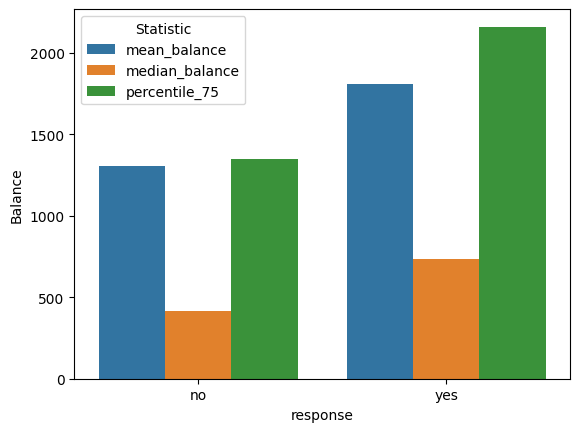

In [105]:
melted_result = result.melt(id_vars='response', 
                             value_vars=['mean_balance', 'median_balance','percentile_75'], 
                             var_name='Statistic', 
                             value_name='Balance')
melted_result
sns.barplot(data=melted_result, x='response', y='Balance', hue='Statistic')

#### Education vs salary 

<Axes: xlabel='edu'>

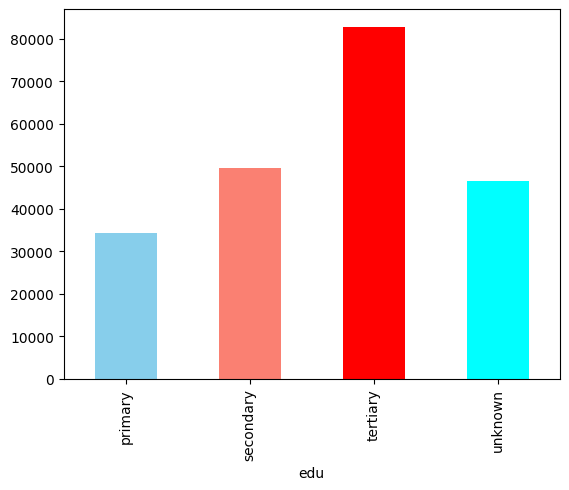

In [106]:
data.groupby('edu')['salary'].mean().plot.bar(color=['skyblue','salmon','red','cyan'])

In [107]:

result2 = data.groupby('edu')['salary'].agg(
    mean_balance='mean',
    median_balance='median',
    percentile_75=lambda x: x.quantile(0.75)
)

result2.reset_index(inplace=True)
result2

,edu,mean_balance,median_balance,percentile_75
0,primary,34232.343910,20000.0,55000.0
1,secondary,49731.449525,55000.0,60000.0
2,tertiary,82880.249887,100000.0,100000.0
3,unknown,46529.633621,50000.0,70000.0


#### Job vs salary

In [108]:
data['response'].unique()

array(['no', 'yes'], dtype=object)

### Segment- 5, Categorical categorical variable 

In [109]:
data['res_flag'] = data['response'].apply(lambda x: 1 if x=='yes' else 0)


#### Education vs response rate

In [110]:
data.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,response,job,edu,duration_in_sec,res_flag
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,May,1,NaN,0,unknown,no,management,tertiary,261.0,0
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,May,1,NaN,0,unknown,no,technician,secondary,151.0,0
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,May,1,NaN,0,unknown,no,entrepreneur,secondary,76.0,0
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,May,1,NaN,0,unknown,no,blue-collar,unknown,92.0,0
4,33.0,0,1,single,no,no,no,no,unknown,5,May,1,NaN,0,unknown,no,unknown,unknown,198.0,0


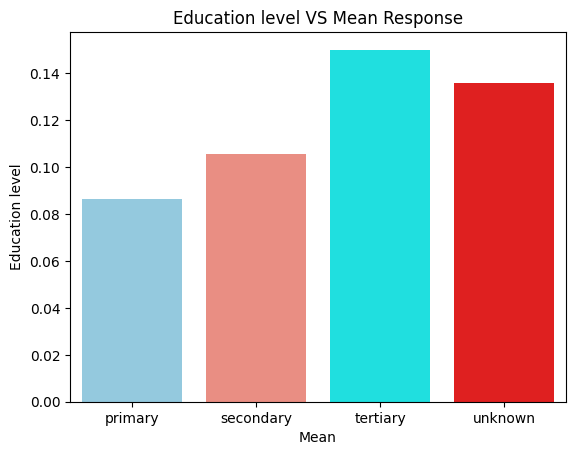

In [111]:
res3 = data.groupby('edu')['res_flag'].agg(mean1='mean').reset_index()
sns.barplot(x=res3['edu'], y=res3['mean1'], hue=res3['edu'],palette=['skyblue','salmon','cyan','red'])
plt.xlabel('Mean')
plt.ylabel('Education level')
plt.title('Education level VS Mean Response')
plt.show()

In [112]:
data.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,response,job,edu,duration_in_sec,res_flag
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,May,1,NaN,0,unknown,no,management,tertiary,261.0,0
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,May,1,NaN,0,unknown,no,technician,secondary,151.0,0
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,May,1,NaN,0,unknown,no,entrepreneur,secondary,76.0,0
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,May,1,NaN,0,unknown,no,blue-collar,unknown,92.0,0
4,33.0,0,1,single,no,no,no,no,unknown,5,May,1,NaN,0,unknown,no,unknown,unknown,198.0,0


#### Marital vs response rate 

In [113]:
m1 = data.groupby('marital')['res_flag'].agg(mean='mean').reset_index()

<Axes: xlabel='marital', ylabel='mean'>

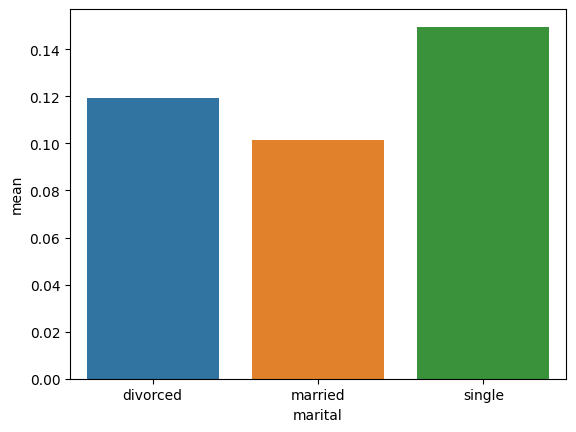

In [114]:

sns.barplot(data=m1, x='marital', y='mean', hue='marital')

#### Loans vs response rate 

<Axes: xlabel='loan', ylabel='mean'>

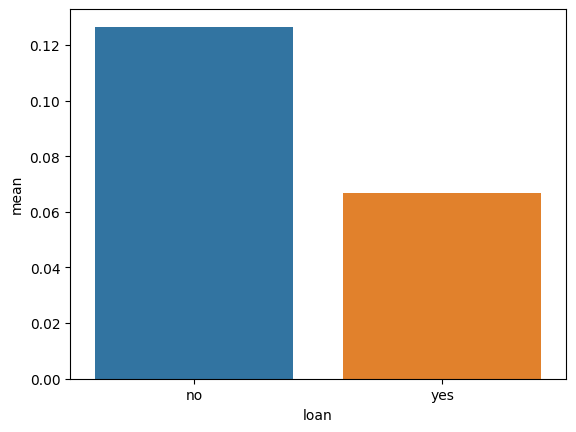

In [115]:
m2 = data.groupby('loan')['res_flag'].agg(mean='mean').reset_index()
sns.barplot(x=m2['loan'], y=m2['mean'], hue=m2['loan'])

#### Housing loans vs response rate 

In [116]:
data

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,response,job,edu,duration_in_sec,res_flag
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,May,1,NaN,0,unknown,no,management,tertiary,261.0,0
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,May,1,NaN,0,unknown,no,technician,secondary,151.0,0
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,May,1,NaN,0,unknown,no,entrepreneur,secondary,76.0,0
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,May,1,NaN,0,unknown,no,blue-collar,unknown,92.0,0
4,33.0,0,1,single,no,no,no,no,unknown,5,May,1,NaN,0,unknown,no,unknown,unknown,198.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,Nov,3,NaN,0,unknown,yes,technician,tertiary,977.0,1
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,Nov,2,NaN,0,unknown,yes,retired,primary,456.0,1
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,Nov,5,184.0,3,success,yes,retired,secondary,1127.0,1
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,Nov,4,NaN,0,unknown,no,blue-collar,secondary,508.0,0


<Axes: xlabel='housing'>

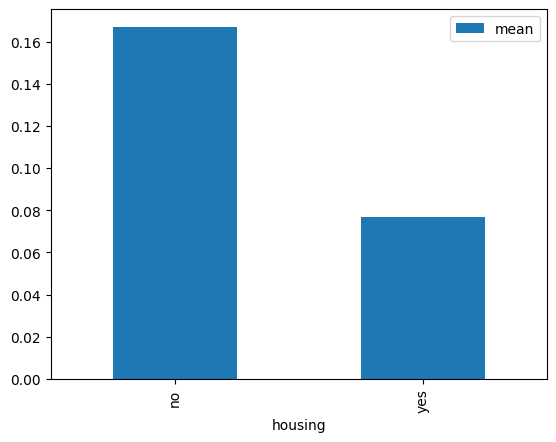

In [117]:
data.groupby('housing')['res_flag'].agg(mean='mean').reset_index().plot.bar(x='housing',y='mean')

In [118]:
melted_result = result.melt(id_vars='response', 
                             value_vars=['mean_balance', 'median_balance','percentile_75'], 
                             var_name='Statistic', 
                             value_name='Balance')
melted_result


,response,Statistic,Balance
0,no,mean_balance,1304.292281
1,yes,mean_balance,1804.681362
2,no,median_balance,417.000000
3,yes,median_balance,733.000000
4,no,percentile_75,1345.000000
5,yes,percentile_75,2159.000000


#### Age vs response 

/var/folders/m5/386nxng97ggdb8s09bq2m9sr0000gn/T/ipykernel_72126/230695257.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=me, x='res_flag', y='Age', palette=['green','purple'])


<Axes: xlabel='res_flag', ylabel='Age'>

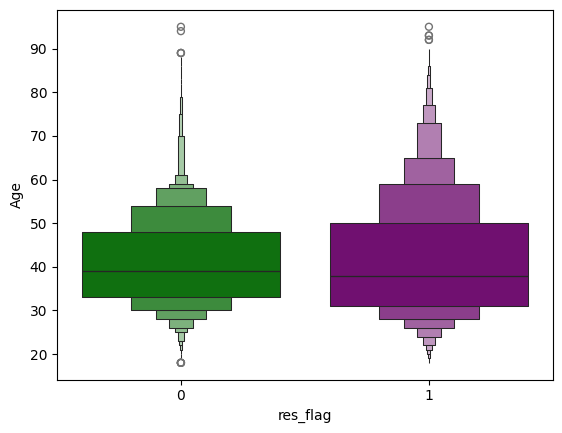

In [119]:
me = data.melt(id_vars='res_flag',value_vars='age', value_name='Age')
sns.boxenplot(data=me, x='res_flag', y='Age', palette=['green','purple'])

##### making buckets from age columns 

In [120]:
data['age'].describe()

count    45161.000000
mean        40.935763
std         10.618790
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [121]:
bins = [0, 30, 40, 50, 60, float('inf')] 
labels = ['<30', '30-40', '40-50', '50-60', '60+']

data['age_bucket'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)
data.sample(10)


,age,salary,balance,marital,targeted,default,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,response,job,edu,duration_in_sec,res_flag,age_bucket
26059,33.0,70000,3910,single,yes,no,yes,no,cellular,19,...,2,NaN,0,unknown,no,services,secondary,676.0,0,30-40
32267,33.0,100000,322,married,yes,no,yes,no,cellular,16,...,3,NaN,0,unknown,no,management,tertiary,77.0,0,30-40
39127,34.0,120000,1068,single,no,no,yes,no,cellular,18,...,6,378.0,2,failure,no,entrepreneur,tertiary,46.0,0,30-40
35099,39.0,8000,1147,married,yes,no,yes,yes,cellular,6,...,2,363.0,5,failure,no,unemployed,primary,232.0,0,30-40
29636,29.0,120000,1028,single,no,no,no,no,cellular,3,...,2,NaN,0,unknown,no,entrepreneur,tertiary,667.0,0,<30
4521,38.0,20000,-152,married,yes,no,no,no,unknown,20,...,1,NaN,0,unknown,no,blue-collar,secondary,100.0,0,30-40
38573,32.0,20000,201,divorced,yes,no,yes,no,cellular,15,...,8,365.0,24,other,no,blue-collar,secondary,63.0,0,30-40
21122,30.0,100000,0,married,yes,no,no,no,cellular,14,...,2,NaN,0,unknown,no,management,tertiary,95.0,0,30-40
11942,48.0,60000,71,married,yes,no,no,no,unknown,20,...,4,NaN,0,unknown,no,technician,secondary,524.0,0,40-50
32579,28.0,20000,1065,single,yes,no,yes,yes,cellular,17,...,1,317.0,1,failure,no,blue-collar,secondary,406.0,0,<30


/var/folders/m5/386nxng97ggdb8s09bq2m9sr0000gn/T/ipykernel_72126/2117064672.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=me, x='res_flag', y='Age', palette=['green','purple'])


<Axes: xlabel='res_flag', ylabel='Age'>

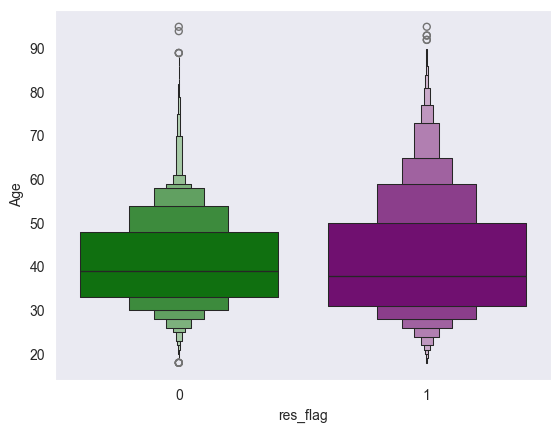

In [122]:
sns.set_style('dark')
sns.boxenplot(data=me, x='res_flag', y='Age', palette=['green','purple'])

/var/folders/m5/386nxng97ggdb8s09bq2m9sr0000gn/T/ipykernel_72126/319022669.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('age_bucket')['res_flag'].mean().plot.bar(color=['red','green','blue','black','purple'])


<Axes: xlabel='age_bucket'>

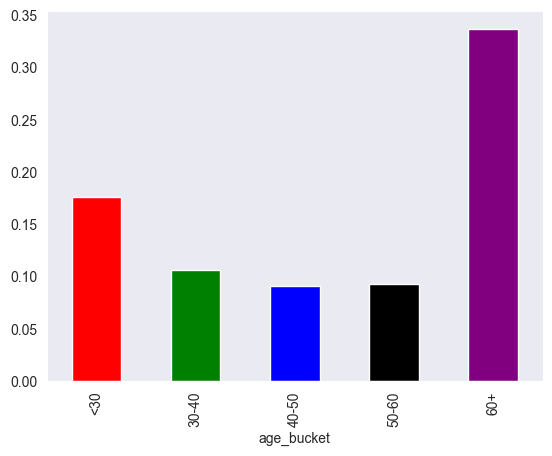

In [123]:
data.groupby('age_bucket')['res_flag'].mean().plot.bar(color=['red','green','blue','black','purple'])

In [124]:
data.groupby

<bound method DataFrame.groupby of         age  salary  balance   marital targeted default housing loan  \
0      58.0  100000     2143   married      yes      no     yes   no   
1      44.0   60000       29    single      yes      no     yes   no   
2      33.0  120000        2   married      yes      no     yes  yes   
3      47.0   20000     1506   married       no      no     yes   no   
4      33.0       0        1    single       no      no      no   no   
...     ...     ...      ...       ...      ...     ...     ...  ...   
45206  51.0   60000      825   married      yes      no      no   no   
45207  71.0   55000     1729  divorced      yes      no      no   no   
45208  72.0   55000     5715   married      yes      no      no   no   
45209  57.0   20000      668   married      yes      no      no   no   
45210  37.0  120000     2971   married      yes      no      no   no   

         contact  day  ... campaign  pdays  previous  poutcome response  \
0        unknown    5  ..

### Segment-6, Multivariate analysis 

#### Education vs marital vs response 

In [125]:
le = data.pivot_table(values='res_flag', index='edu', columns='marital', aggfunc='mean')
le

marital,divorced,married,single
edu,,,
primary,0.138852,0.075601,0.106808
secondary,0.103559,0.094650,0.129271
tertiary,0.137415,0.129835,0.183737
unknown,0.142012,0.122519,0.162879


<Axes: xlabel='marital', ylabel='edu'>

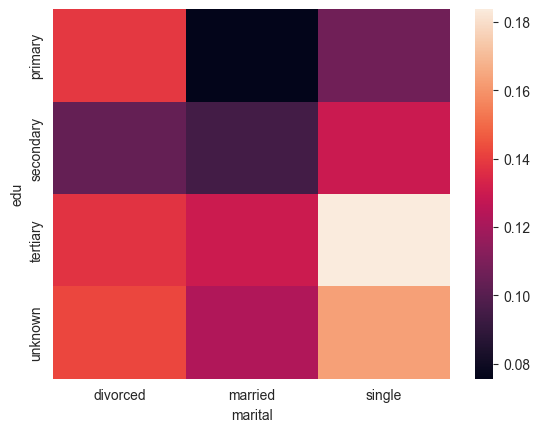

In [126]:
sns.heatmap(le)

#### Job vs marital vs response 

In [127]:
le1 = data.pivot_table(values='res_flag', index='job', columns='marital', aggfunc='mean')
le1

marital,divorced,married,single
job,,,
admin.,0.120160,0.113383,0.136153
blue-collar,0.077644,0.062778,0.105760
entrepreneur,0.083799,0.075843,0.113924
housemaid,0.097826,0.072527,0.166667
management,0.127928,0.126228,0.162254
retired,0.283688,0.220682,0.120370
self-employed,0.158273,0.079637,0.191874
services,0.091241,0.074105,0.117696
student,0.166667,0.185185,0.293850


<Axes: xlabel='marital', ylabel='job'>

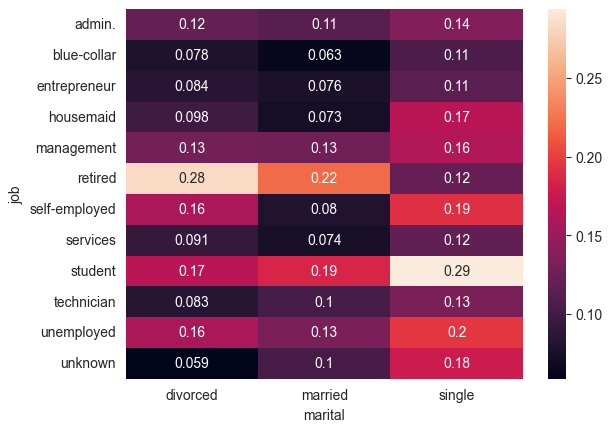

In [128]:
sns.heatmap(le1, annot=True)

#### Education vs poutcome vs response

In [129]:
le2 = data.pivot_table(values='res_flag', index='edu', columns='poutcome', aggfunc='mean')
le2

poutcome,failure,other,success,unknown
edu,,,,
primary,0.088785,0.143443,0.609023,0.071821
secondary,0.109007,0.140831,0.641902,0.084244
tertiary,0.168683,0.220994,0.657005,0.114256
unknown,0.158192,0.200000,0.679012,0.101761


<Axes: xlabel='poutcome', ylabel='edu'>

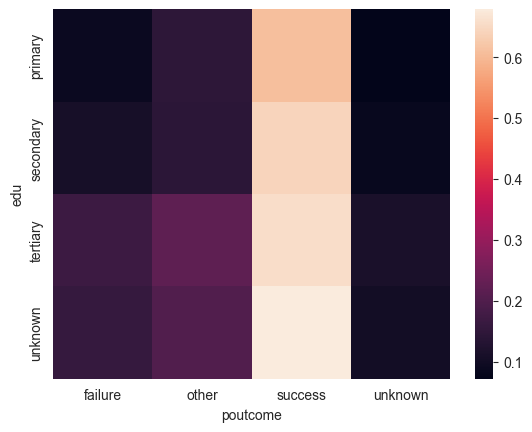

In [130]:
sns.heatmap(le2)

/var/folders/m5/386nxng97ggdb8s09bq2m9sr0000gn/T/ipykernel_72126/3558556589.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data.pivot_table( columns='job', values='campaign', aggfunc=sum).plot.barh()


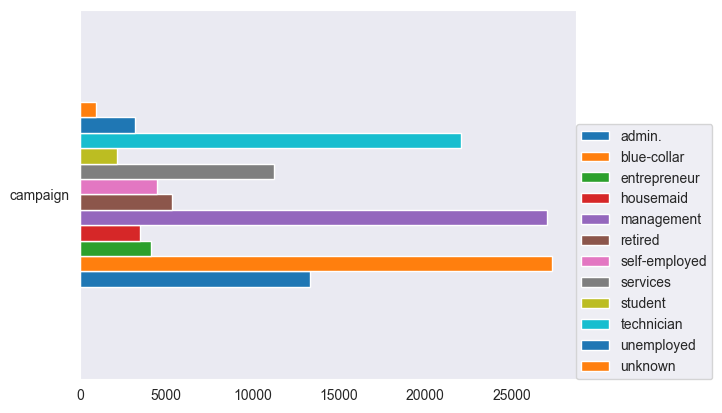

In [131]:
data.pivot_table( columns='job', values='campaign', aggfunc=sum).plot.barh()
plt.legend(loc=[1,0])

# I Know My Shit!